In [ ]:
import zipfile
zip_ref = zipfile.ZipFile("Mobile.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("train.csv")
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [ ]:
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [ ]:
df["price_range"].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

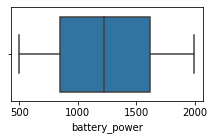

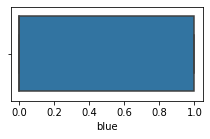

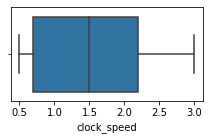

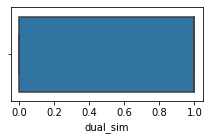

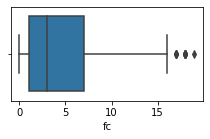

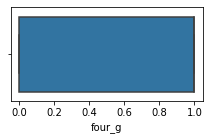

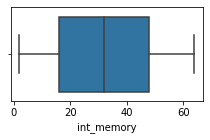

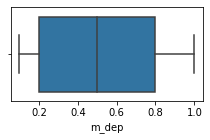

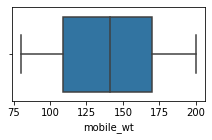

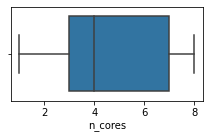

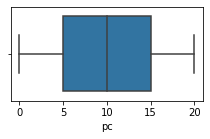

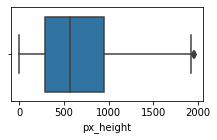

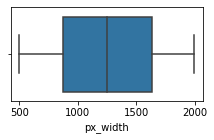

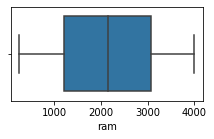

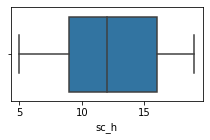

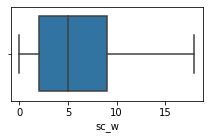

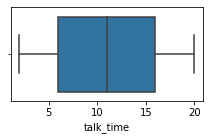

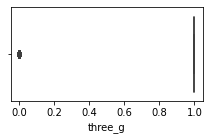

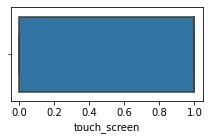

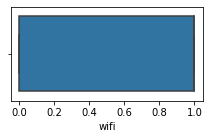

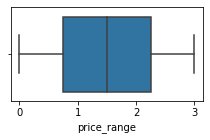

In [ ]:
for i in range(len(df.columns)):
  plt.figure(figsize = (20, 10))
  plt.subplot(5, 5, i+1)
  sns.boxplot(df[df.columns[i]])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

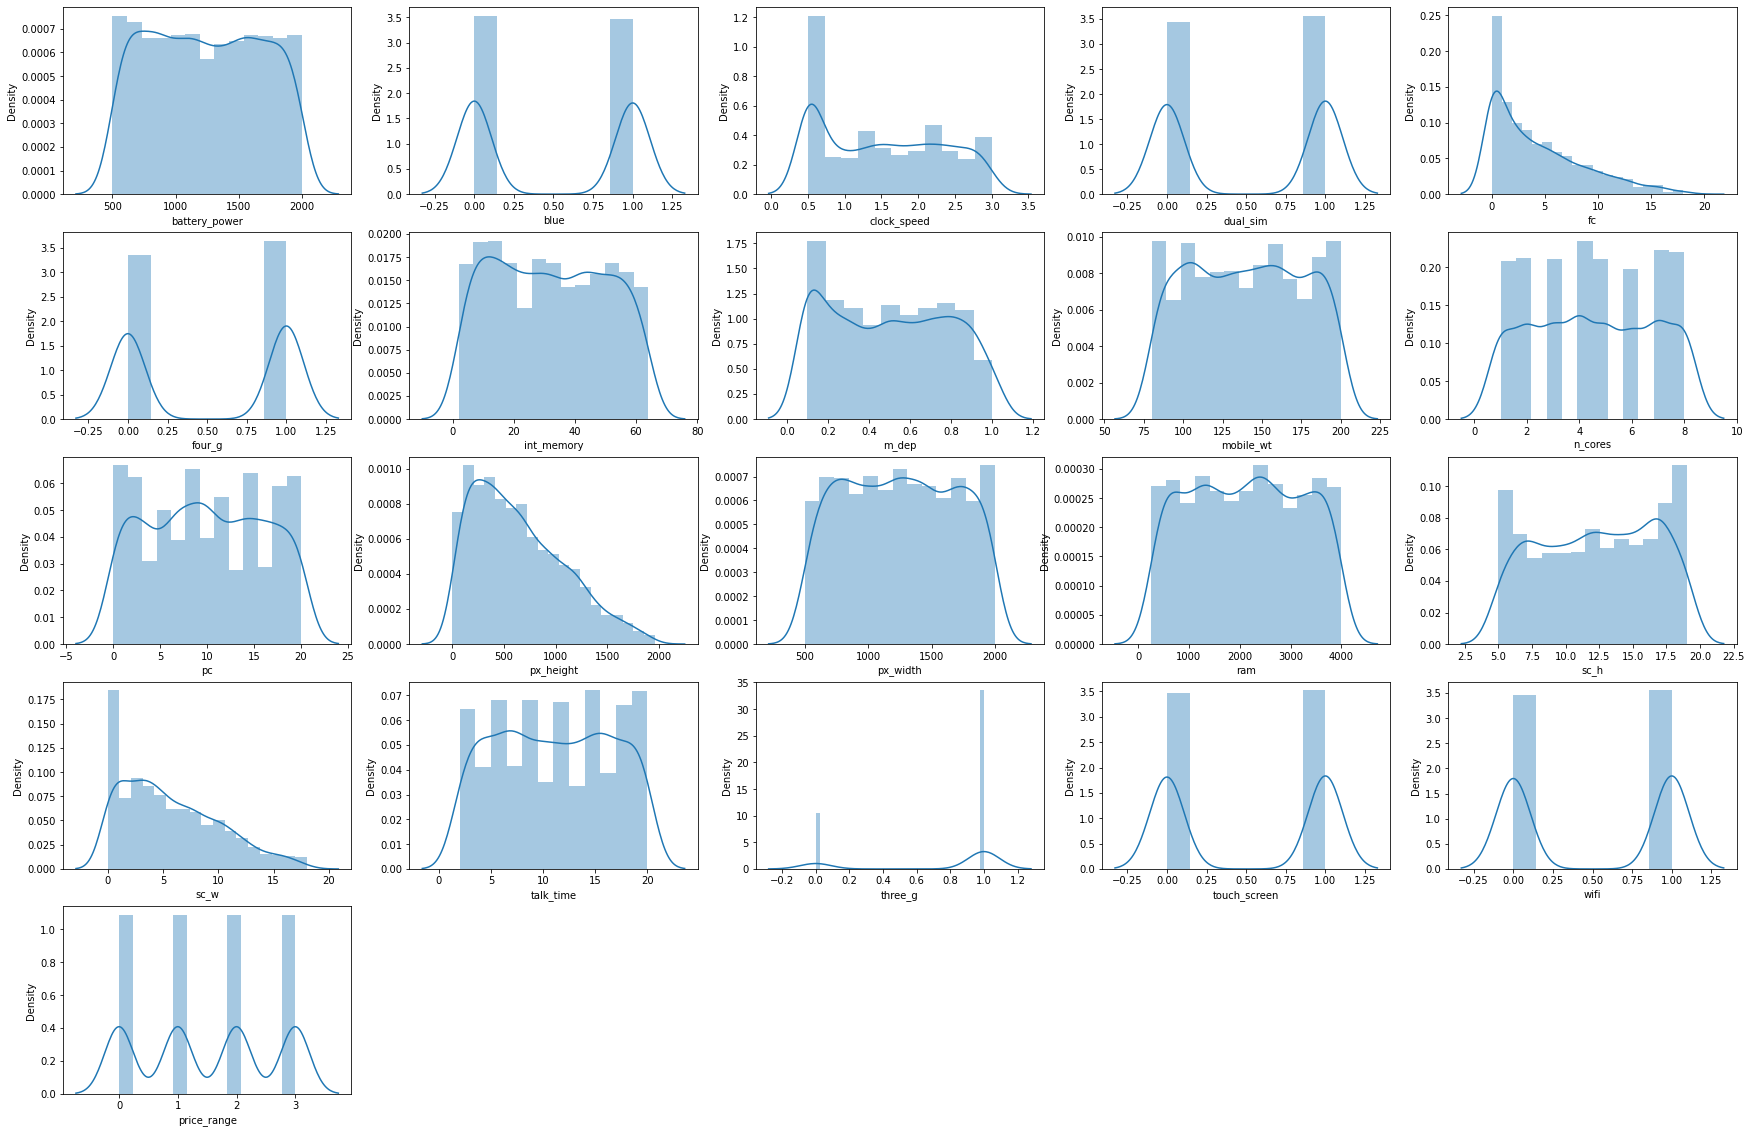

In [ ]:
plt.figure(figsize = (30, 20))

for i in range(len(df.columns)):
  plt.subplot(5, 5, i+1)
  sns.distplot(df[df.columns[i]])


In [ ]:
skew = ["battery_power", "clock_speed", "fc", "int_memory", "m_dep", "mobile_wt", "pc", "px_height", "px_width", "ram", 
        "sc_h", "sc_w", "talk_time"]

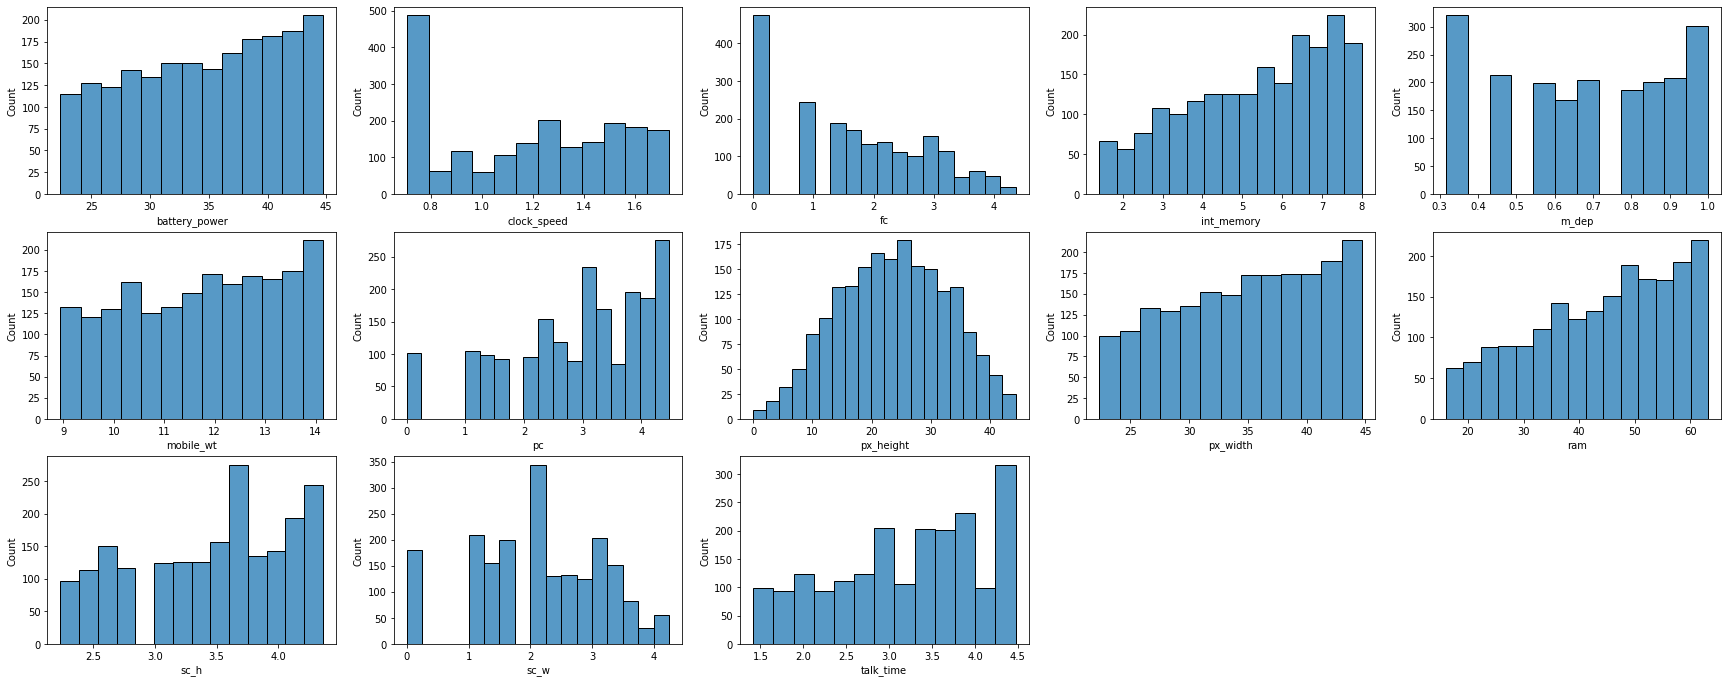

In [ ]:
plt.figure(figsize = (30, 20))

for i in range(len(skew)):
  plt.subplot(5, 5, i+1)
  sns.histplot(np.sqrt(df[skew[i]]))


In [ ]:
for i in range(len(skew)):

  df[skew[i]] = np.sqrt(df[skew[i]])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = df.drop("price_range", axis = 1)
y = df["price_range"]

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y,test_size= 0.2,  random_state= 42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

xtrain = scalar.fit_transform(xtrain)
xtest = scalar.transform(xtest)

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier, XGBRFClassifier

In [ ]:
random_forest = RandomForestClassifier(n_estimators = 100, criterion = "entropy")
random_forest.fit(xtrain, ytrain)

RandomForestClassifier(criterion='entropy')

In [ ]:
y_pred_rf = random_forest.predict(xtest)

In [ ]:
from sklearn.metrics import accuracy_score
rf_accuracy = accuracy_score(ytest, y_pred_rf)

In [ ]:
rf_accuracy

0.9075

In [ ]:
g_boost = GradientBoostingClassifier(n_estimators = 100, criterion = "mse", learning_rate = 0.1)
g_boost.fit(xtrain, ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:475: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: C

GradientBoostingClassifier(criterion='mse')

In [ ]:
y_pred_gb = g_boost.predict(xtest)

In [ ]:
from sklearn.metrics import accuracy_score
gb_accuracy = accuracy_score(ytest, y_pred_gb)
gb_accuracy

0.91

In [ ]:
xgb_classifier = XGBClassifier()
xgb_classifier.fit(xtrain, ytrain)

XGBClassifier(objective='multi:softprob')

In [ ]:
y_pred_xgb = xgb_classifier.predict(xtest)

In [ ]:
from sklearn.metrics import accuracy_score
xgb_accuracy = accuracy_score(ytest, y_pred_xgb)

In [ ]:
xgbrf_classifier = XGBRFClassifier()
xgbrf_classifier.fit(xtrain, ytrain)

XGBRFClassifier(objective='multi:softprob')

In [ ]:
y_pred_xgbrf = xgbrf_classifier.predict(xtest)

In [ ]:
from sklearn.metrics import accuracy_score
xgbrf_accuracy = accuracy_score(ytest, y_pred_xgbrf)

In [ ]:
from sklearn.naive_bayes import BernoulliNB

In [ ]:
nb_classifier = BernoulliNB()

In [ ]:
nb_classifier.fit(xtrain, ytrain)

BernoulliNB()

In [ ]:
y_pred_nb = nb_classifier.predict(xtest)

In [ ]:
from sklearn.metrics import accuracy_score
nb_accuracy = accuracy_score(ytest, y_pred_xgbrf)

In [ ]:
test_df = pd.read_csv("test.csv")
test_df.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [ ]:
test_df = test_df.drop("id", axis = 1)

In [ ]:
test_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [ ]:
x.columns, test_df.columns

(Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
        'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
        'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
        'touch_screen', 'wifi'],
       dtype='object'),
 Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
        'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
        'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
        'touch_screen', 'wifi'],
       dtype='object'))

In [ ]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

test_df_train = scalar.fit_transform(test_df)


In [ ]:
y_pred_test = random_forest.predict(test_df)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
y_pred_test[:10]

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [ ]:
rf_accuracy, gb_accuracy, xgb_accuracy, xgbrf_accuracy, nb_accuracy

(0.9075, 0.91, 0.895, 0.805, 0.805)

In [ ]:
len(test_df.columns)

20

In [ ]:
from sklearn.feature_selection import RFE

rfe_selector = RFE(estimator=GradientBoostingClassifier(),n_features_to_select = 12, step = 1)
rfe_selector.fit(x, y)
new_x = x.columns[rfe_selector.get_support()]

In [ ]:
new_x

Index(['battery_power', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores',
       'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w'],
      dtype='object')

In [ ]:
new_df = pd.read_csv("train.csv")
new_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
new_x = list(new_x) + ["price_range"]

new_df = new_df[new_x]

In [ ]:
new_df.head()

,battery_power,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,price_range
0,842,1,7,0.6,188,2,2,20,756,2549,9,7,1
1,1021,0,53,0.7,136,3,6,905,1988,2631,17,3,2
2,563,2,41,0.9,145,5,6,1263,1716,2603,11,2,2
3,615,0,10,0.8,131,6,9,1216,1786,2769,16,8,2
4,1821,13,44,0.6,141,2,14,1208,1212,1411,8,2,1


In [ ]:
x_new = new_df.drop("price_range", axis = 1)
y_new = new_df["price_range"]

In [ ]:
new_xtrain, new_xtest, new_ytrain, new_ytest = train_test_split(x_new, y_new, random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

new_xtrain = scalar.fit_transform(new_xtrain)
new_xtest = scalar.transform(new_xtest)

In [ ]:
gboost_new = GradientBoostingClassifier(n_estimators = 100, criterion = "mse", learning_rate = 0.01)
gboost_new.fit(xtrain, ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:475: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: C

GradientBoostingClassifier(criterion='mse', learning_rate=0.01)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred_gb = g_boost.predict(xtest)
gb_accuracy = accuracy_score(ytest, y_pred_gb)

In [ ]:
gb_accuracy

0.91

In [ ]:
param = [{"loss": ["log_loss", "deviance", "exponential"]},
         {"n_estimators": [1, 10, 100, 1000]}, 
         {"criterion": ["friedman_mse", "squared_error", "mse"]}
       ]

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator = g_boost,  
                           param_grid = param,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)
grid_search.fit(xtest, ytest)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-pac

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(criterion='mse'),
             param_grid=[{'loss': ['log_loss', 'deviance', 'exponential']},
                         {'n_estimators': [1, 10, 100, 1000]},
                         {'criterion': ['friedman_mse', 'squared_error',
                                        'mse']}],
             scoring='accuracy')

In [ ]:
grid_search.best_score_

0.8225

In [ ]:
grid_search.best_params_

{'n_estimators': 1000}

In [ ]:
from sklearn import feature_selection as fs

In [ ]:
len(x.columns)


20

In [ ]:
fs_fit_fscore = fs.SelectKBest(fs.f_classif, k=len(x.columns))
fs_fit_fscore.fit_transform(xtrain, ytrain)
fs_indices_fscore = np.argsort(np.nan_to_num(fs_fit_fscore.scores_))[::-1][0:len(x.columns)]
fs_indices_fscore

array([13,  0, 12, 11,  6,  8, 14,  9,  7, 16, 18, 10,  2,  1,  5, 15, 17,
        4,  3, 19])

In [ ]:
best_features_fscore = x.columns[fs_indices_fscore].values
best_features_fscore

array(['ram', 'battery_power', 'px_width', 'px_height', 'int_memory',
       'mobile_wt', 'sc_h', 'n_cores', 'm_dep', 'talk_time',
       'touch_screen', 'pc', 'clock_speed', 'blue', 'four_g', 'sc_w',
       'three_g', 'fc', 'dual_sim', 'wifi'], dtype=object)

In [ ]:
from sklearn.svm import SVC

model = SVC()
model.fit(xtrain, ytrain)
y_pred = model.predict(xtest)
accuracy_score(y_pred, ytest)

0.89